# O canhão de Newton

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 13 de Abril de 2022

Neste `Notebook` construiremos o tão conhecido canhão de Newton.

O objetivo é modelar o problema de tal forma que possamos obter as equações diferenciais necessárias para resolver o problema. Em seguida, construiremos a solução computacional para as diferentes condições iniciais que definiremos para o problema.

### Importando as bibliotecas necessárias

Neste `Notebook`, utilizaremos as bibliotecas `matplotlib`, `scipy` e `numpy`.

In [1]:
import matplotlib.pyplot as plt
import scipy.constants as sconst
import numpy as np

## 1. O que é o canhão de Newton?

Imagine que você está em cima de uma montanha e atira uma bola de canhão horizontalmente. Até tocar o chão, qual será a trajetória da bola de canhão? A resposta natural seria algo no formato de um arco. Este arco seria cada vez maior conforme aumentássemos a velocidade inicial da bola de canhão.

Com a velocidade "certa", podemos imaginar uma situação onde o projétil daria uma volta completa em torno da Terra, sempre “caindo” sob ação da gravidade, mas nunca alcançando a Terra. O experimento mental feito por Isaac Newton trata justamente desta questão.

![O canhão de Newton](../Imagens/canhao.jpg)

## 2. Modelando o canhão

Suponha que tenhamos uma bola de canhão de massa $m$ que está sujeita a uma atração gravitacional causada por um corpo de massa $M$ e raio $R$. Estrategicamente, colocaremos a origem de nosso sistema no centro de massa do corpo de massa $M$. A posição de nossa bola de canhão poderá ser dada pelo vetor $\vec{r}$.

Assim, podemos dizer que a força gravitacional $\vec{F}$ que age em $m$ devido a $M$ poderá ser dada por (para simplificar o uso da notação, usemos $||\vec{r}|| = r$)

$$
\vec{F} = -G\frac{mM}{r^2}\hat{r}.
$$

Assim, podemos dizer que

$$
\vec{g} = -G\frac{M}{r^2}\hat{r}.
$$

Como $\hat{r} = \vec{r}/r$, sabendo que $\vec{r} = x\hat{i} + y\hat{j}$, teremos

$$
\vec{g} = -G\frac{M}{r^3}(x\hat{i} + y\hat{j}).
$$

O que nos dará as seguintes equações diferenciais de segunda ordem

$$
\frac{d^2x}{dt^2} = - \frac{GM}{r^3}x,
$$
$$
\frac{d^2y}{dt^2} = - \frac{GM}{r^3}y,
$$

onde $r$ pode ser dado por $r = \sqrt{x^2 + y^2}$.

Por fins práticos, podemos escrever que

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dy}{dt} = v_y,
$$

para que

$$
\frac{dv_x}{dt} = - \frac{GM}{r^3}x,
$$
$$
\frac{dv_y}{dt} = - \frac{GM}{r^3}y,
$$

originando 4 EDO's de 1ª ordem.

 Para o nosso problema em específico, definiremos algumas condições iniciais interessantes que nos permitirão resolver o problema.

![](../Imagens/diagramacondicoesiniciais.png)

O diagrama acima mostra esquematicamente como definiremos algumas das condições iniciais do problema.

Em $t = 0$, portanto:

$$
x = 0,\ \ y = R + H,
$$

$$
v_x = v_{0x},\ \ v_y = 0.
$$


Agora, basta que utilizemos algum método pra lidar com estas equações diferenciais, desde que temos as condições iniciais. Para isso, utilizaremos o método de Runge-Kutta de 4ª ordem.

## 3. Resolvendo o problema

Recordemos como é enunciado o método de Runge-Kutta de 4ª ordem (RK4).

Seja um problema de valor inicial especificado tal que:

$$
y' = f(t, y), \ \ y(t_0) = y_0.
$$

Então o método RK4 para este problema é dado pelas seguintes equações:

$$
y_{n+1} = y_{n} + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4),
$$

$$
t_{n+1} = t_{n} + h,
$$

onde $y_{n+1}$ é a aproximação por RK4 de $y(t_{n+1})$, e

$$
k_1 = f(t_n,y_n),
$$
$$
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1),
$$
$$
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2),
$$
$$
k_4 = f(t_n + h, y_n + hk_3).
$$

Dado o nosso problema, teremos uma função $f$ para cada uma das 4 EDO's originadas. Portanto

$$
f_x = v_x,
$$

$$
f_{v_x} = - \frac{GM}{r^3}x,
$$

$$
f_y = v_y,
$$

$$
f_{v_y} = - \frac{GM}{r^3}y.
$$

Para fins práticos, faremos uma array `r` que conterá os valores de $x$, $v_x$, $y$ e $v_y$. Também definiremos alguns parâmetros iniciais.

Desprezando os diversos efeitos que possam surgir e considerando a Terra como sendo aproximadamente esférica, faremos dela (aproximadamente) o objeto de massa M. Assim, consideraremos as seguintes condições iniciais.

$$
G \approx 6.674184 \cdot 10^{-11}\  m^3 kg^{-1} s^{-1},
$$
$$
M \approx 5.9722 \cdot 10^{24}\ kg,
$$
$$
R \approx 6371\ km,
$$
$$
H = 2000\ km,
$$
$$
x = 0, \ \ y = H + R.
$$
$$
v_x = 1\ km/s, \ \ v_y = 0.
$$

Iremos avaliar 5000 pontos de $t = 0$ até $t = 20000s$. 

Em código:

In [2]:
# Definindo parâmetros iniciais

G = sconst.G # (m^3.kg^-1.s^-2)
M = 5.9722e+24 # (kg)
R = 6371000 # (metros)
H = 2000000 # (metros)
x, y = 0, H + R
vx, vy = 1000.0, 0.0
r = np.array([x, vx, y, vy],float)
t1, t2 = 0, 20000.0
N = 5000
h = (t2-t1)/N

Definiremos, também, nossa função `f`, que receberá como parâmetro a array `r` (que leva consigo os valores de $x$, $v_x$, $f_y$ e $v_y$). Esta função terá como retorno uma outra array com os valores de $f_x$, $f_{v_x}$, $f_y$ e $f_{v_y}$.

Pelo fim de diferenciar a array `r` do programa e a distância $r$ utilizada na seção onde modelamos o canhão, representaremos a distância $r$ como sendo a variável `rr` no programa.

In [3]:
# Definindo f(r)
def f(r,t):
    x, vx, y, vy = r[0],r[1],r[2],r[3]
    rr = np.sqrt(x*x + y*y)

    fx = vx
    fvx = -G*M*x/(rr**3)
    fy = vy
    fvy = -G*M*y/(rr**3)

    return np.array([fx, fvx, fy, fvy], float)

É necessário agora implementarmos uma função que execute o método RK4. Usaremos a função `RK4` para isso.

In [4]:
# Definindo a função do método de Runge-Kutta de 4a ordem
def RK4(r,t):
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    return r+(1/6)*(k1+2*k2+2*k3+k4)

Agora, executaremos o código impondo a seguinte condição: caso a distância $r$ (representada por `rr` no código) for menor que o raio $R$, o valor não deverá mais ser computado.

A condição se faz necessária, pois ela indicará que a bola de canhão terá encostado na superfície terrestre.

Em código, computaremos o valor apenas quando $r$ for maior ou igual a $R$.  

In [5]:
# Definindo listas
tempos = np.linspace(t1, t2, N)
y_list = []
x_list = []

# Computando o valor
for t in tempos:
    rr = np.sqrt(r[0]*r[0] + r[2]*r[2])
    if(rr >= R):
        r = RK4(r,t)
    x_list.append(r[0])
    y_list.append(r[2])
    

Por fim, plotamos o nosso gráfico. Plotaremos, também, o círculo de raio $R$ para referência visual.

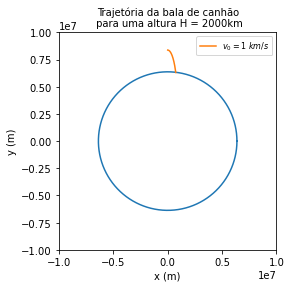

In [6]:
# Definindo os pontos do círculo de raio R
theta_list = np.linspace(0, 2*np.pi, N)
xR_list = []
yR_list = []
for theta in theta_list:
    xR = R*np.cos(theta)
    yR = R*np.sin(theta)
    xR_list.append(xR)
    yR_list.append(yR)

# Plotando o gráfico e o círculo de raio R
plt.title("Trajetória da bala de canhão\n para uma altura H = 2000km", fontsize = 10)
plt.plot(xR_list, yR_list)
plt.plot(x_list, y_list, label="$v_0 = 1\ km/s$")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(prop={'size': 8})
plt.axis('square')
plt.xlim(-1e7, 1e7)
plt.ylim(-1e7, 1e7)
plt.show()

Note que a trajetória será mais ou menos como o esperado. Como a velocidade que usamos é bem menor que a velocidade orbital necessária para esta faixa de altura $H$, teremos a trajetória de um simples arco que cai em direção a superfície terrestre.

Façamos agora múltiplas simulações para diferentes velocidades iniciais. Assim, para $t = 0$, nos múltiplos casos:


$$
v_{1x} = 1000\ m/s
$$

$$
v_{2x} = 2000\ m/s
$$

$$
v_{3x} = 4000\ m/s
$$

$$
v_{4x} = 6000\ m/s
$$

$$
v_{5x} = 7000\ m/s
$$

$$
v_{6x} = 8000\ m/s
$$

Neste caso, para cada velocidade inicial, teremos um conjunto de EDO's pra solucionar. Assim, é mais cômodo que façamos o processo da seguinte forma:

In [7]:
def trajectory(v):
    x, y = 0, H + R
    vx, vy = v, 0.0
    r = np.array([x, vx, y, vy],float)

    # Definindo listas
    tempos = np.linspace(t1, t2, N)
    y_list = []
    x_list = []

    # Computando o valor
    for t in tempos:
        rr = np.sqrt(r[0]*r[0] + r[2]*r[2])
        if(rr >= R):
            r = RK4(r,t)
        x_list.append(r[0])
        y_list.append(r[2])
    return x_list, y_list
    

Primeiramente, definimos uma função chamada `trajectory` que recebe como parâmetro uma condição inicial de $v_x$ e retorna as listas que contém as coordenadas de $x$ e $y$ para cada condição inicial dada.

Agora, o que faremos é definir uma lista com diferentes velocidades iniciais de $v_x$ e, para cada elemento desta lista, faremos o mesmo processo de gerar as listas contendo as trajetórias.

Em seguida, plotamos os gráficos das diferentes trajetórias.

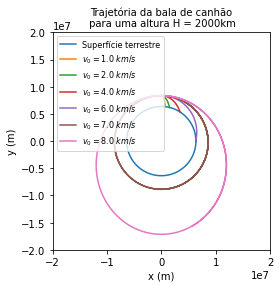

In [8]:

# Plotando o círculo de raio R
plt.plot(xR_list, yR_list, label="Superfície terrestre")

vx_list = [1000.0, 2000.0, 4000.0, 6000.0, 7000.0, 8000.0]

for v in vx_list:
    x_list, y_list = trajectory(v)
    plt.plot(x_list, y_list, label="$v_0 = $" + str(v/1000) + "$\ km/s$")

# Plotando os gráficos
plt.title("Trajetória da bala de canhão\n para uma altura H = 2000km", fontsize = 10)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(prop={'size': 8})
plt.axis('square')
plt.xlim(-2e7, 2e7)
plt.ylim(-2e7, 2e7)
plt.show()


Podemos ver, por meio do gráfico acima, que uma velocidade orbital para uma órbita circular estará em torno de $7\ km/s$, enquanto velocidades superiores, como $8\ km/s$, geram uma órbita elíptica. 

Para velocidades inferiores ($6\ km/s$ ou menor), podemos ver que não há órbita gerada, pois a bola de canhão acaba se chocando com a superfície terrestre.

## Conclusão

Um dos intuitos deste `Notebook` foi mostrar como a construção deste tipo de problema pode ser feita. Quando tratamos de problemas deste tipo, é comum que procuremos por equações diferenciais que possamos resolver computacionalmente (como foi o caso aqui, onde usamos o método RK4).

Com tudo que foi dito, concluímos por aqui este `Notebook`, onde foi possível construirmos o canhão de Newton para diferentes condições iniciais de velocidade.

## Referências

**[1]** <https://en.wikipedia.org/wiki/Newton%27s_cannonball>

**[2]** <https://en.wikipedia.org/wiki/Orbital_speed>

**[3]** <https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods>